# **TASK - 1 TITANIC SURVIVAL PREDICTION**

Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Reading the csv file
titanic_data1 = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
#Displaying the all values of dataframe
titanic_data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Column description :                      
PassengerId: A unique identifier assigned to each passenger.
Survived: Indicates whether a passenger survived (1) or died (0).

Pclass: Represents the passenger class, which can be a numerical or categorical value indicating the class of travel (e.g., first, second, or third class).

Name: The name of the passenger.

Sex: Represents the gender of the passenger, typically categorized as male or female.

Age: The age of the passenger, often represented as a numerical value.

SibSp: Indicates the number of siblings or spouses traveling with the passenger.

Parch: Represents the number of parents or children traveling with the passenger.

Ticket: The ticket number associated with the passenger's ticket.

Fare: The amount of money spent on the ticket.

Cabin: Represents the cabin category or number assigned to the passenger, if available.

Embarked: Indicates the port where the passenger embarked from, typically represented by a single character code (e.g., C for Cherbourg, Q for Queenstown, S for Southampton).

In [ ]:
#Getting first 5 Values
titanic_data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **DATA INSPECTION**

In [ ]:
#Getting some information about titanic_data
titanic_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Checking the number of missing Values in the dataset
titanic_data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the Missing Values                
-There are total 3 columns which has missing values             
-The column 'Cabin' has 687 missing values so first of all we will remove the column from dataframe

In [ ]:
# Removing column Cabin
titanic_data1 = titanic_data1.drop(columns = 'Cabin' , axis = 1)

In [ ]:
#Replace all the missing Age values with the mean of all values in Age cloumn
titanic_data1['Age'].fillna(titanic_data1['Age'].mean() , inplace=True)

In [ ]:
# finding the most repeating values in Embarked column
print(titanic_data1['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
# Replacing the missing values from the 'Embarked' column with mode value i.e. S
titanic_data1['Embarked'].fillna(titanic_data1['Embarked'].mode()[0] , inplace = True)

In [ ]:
# Checking the missing values again
titanic_data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# **DATA ANALYSIS**

In [ ]:
#Getting some statistical measures about titanic dataset
titanic_data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#finding the number of people survived or not
titanic_data1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Here 0 - Passangers didn't survived               
     1 - Passangers Survived                        
     The value count shows that Outof total 891 Passangers only 342 passangers will survied.

# **DATA VISUALISATION**

In [ ]:
import seaborn as sns

sns.set()

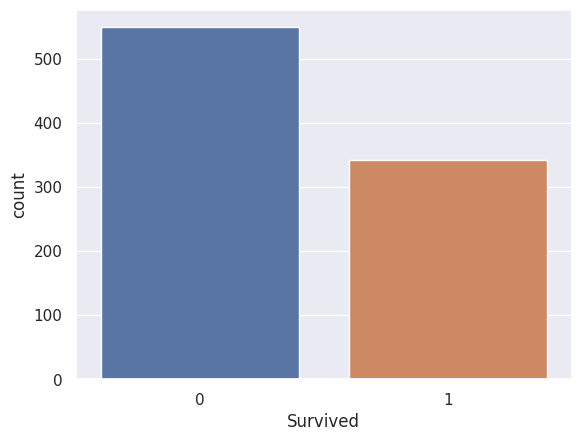

In [ ]:
# Making a count plot for 'Survived' Column
sns.countplot(x='Survived' , data = titanic_data1)
plt.show()

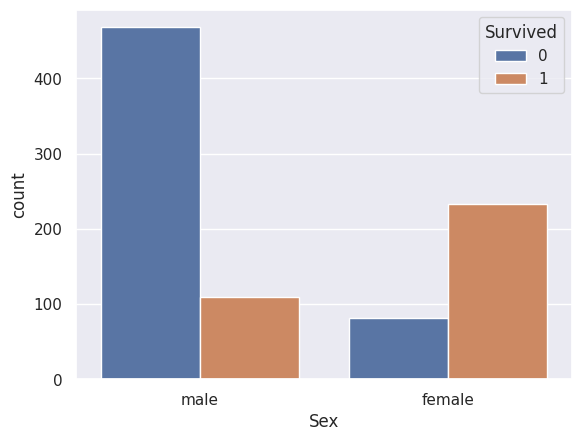

In [ ]:
# We can see how many males and females are survived in titanic
sns.countplot(x='Sex' , hue='Survived' , data=titanic_data1)
plt.show()

Insight- from given plot we can say that the females get more priority to be saved in titanic

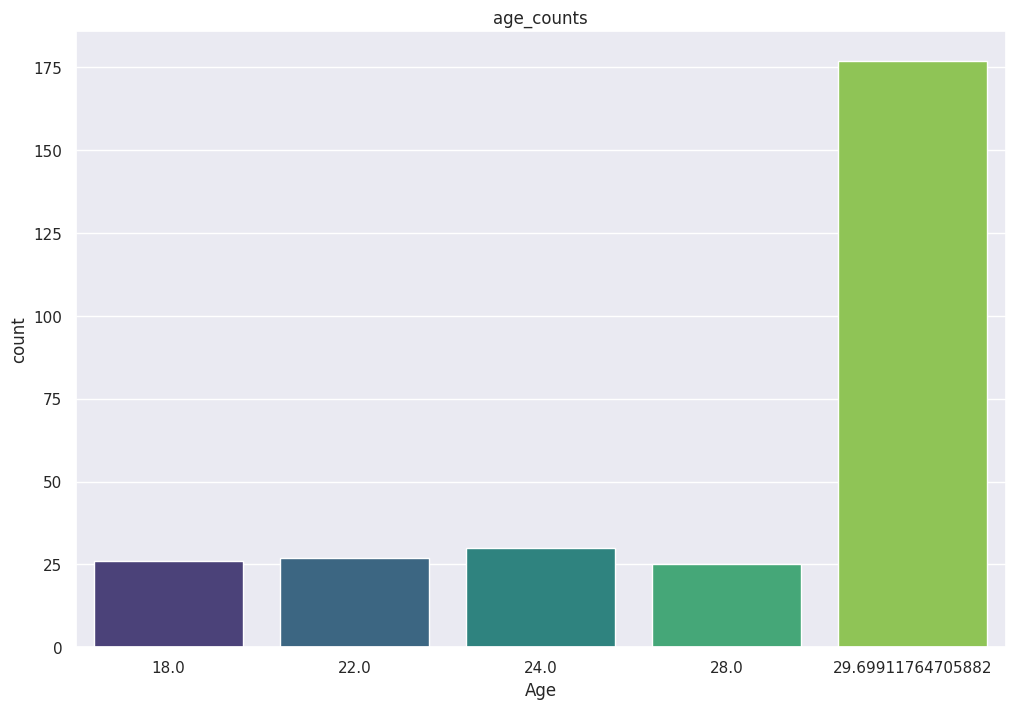

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
Name: Age, dtype: int64

In [ ]:
# most 5 age in data
age_counts=titanic_data1['Age'].value_counts().head()

plt.figure(figsize=(12,8))
sns.barplot(x=age_counts.index,y=age_counts.values,palette='viridis')
plt.title('age_counts')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()
age_counts

In [ ]:
pclass_counts=titanic_data1['Pclass'].value_counts()
pclass_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

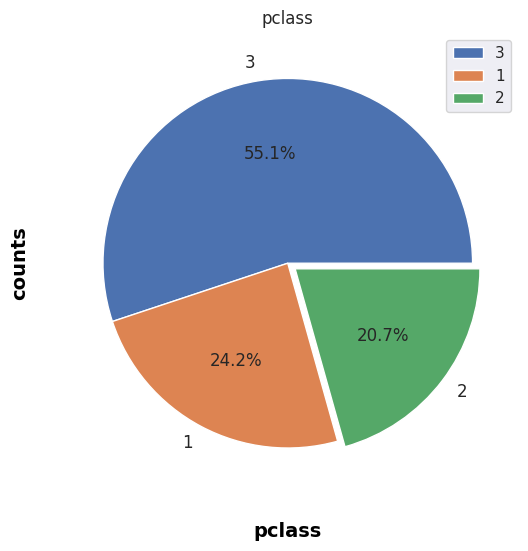

In [ ]:
# Making a count plot for 'Pclass' Column
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
pclass_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('pclass')
plt.xlabel('pclass', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = pclass_counts.index, loc = "best")
plt.show()

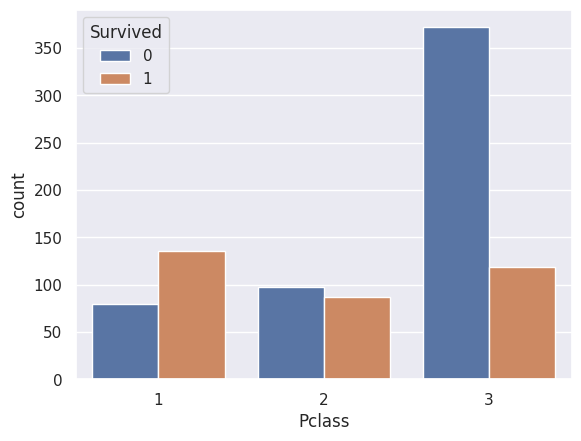

In [ ]:
# Making visualisation for Pclass who survived more
sns.countplot(x='Pclass' , hue='Survived' , data=titanic_data1)
plt.show()


Here 'Pclass' column denotes the ticket class 1=First class , 2=Second class , 3=third class . The majority of people survived from the first class.

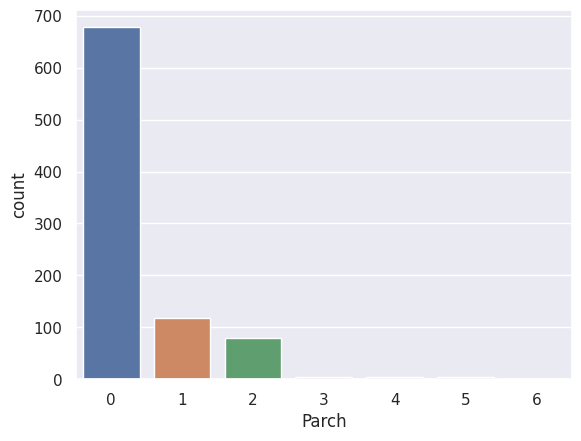

In [ ]:
# Making a count plot for 'Parch' Column
sns.countplot(x='Parch' , data = titanic_data1)
plt.show()

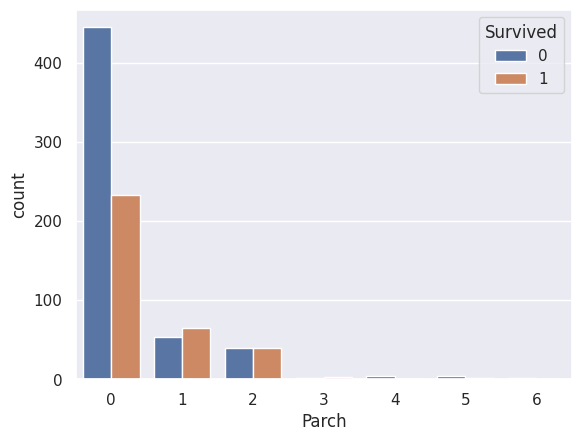

In [ ]:
# We can see how Parents and childrens are survived in titanic
sns.countplot(x='Parch' , hue='Survived' , data=titanic_data1)
plt.show()

In [ ]:
Embarked_counts = titanic_data1['Embarked'].value_counts()
Embarked_counts

S    646
C    168
Q     77
Name: Embarked, dtype: int64

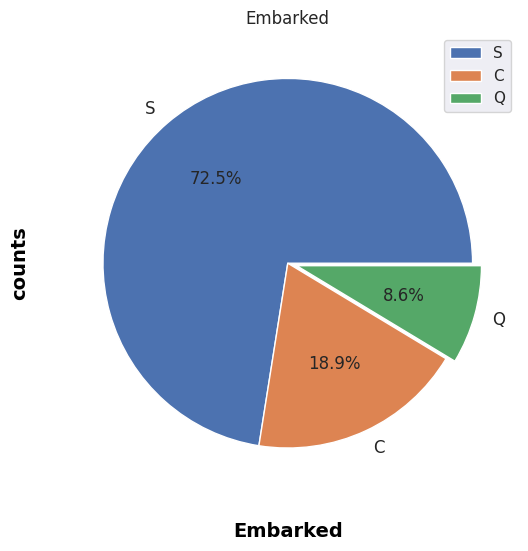

In [ ]:
#Visualisationfor 'Embarked' column
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
Embarked_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Embarked')
plt.xlabel('Embarked', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Embarked_counts.index, loc = "best")
plt.show()

# **ENCODING CATEGORICAL COLUMN**

In given data set the 'Name' , 'Sex' , 'Embarked' are categorical column which are not understand by machine so to make it easy for machine we are going to convert the categorical column into numeric values which understood by machine very easily .

In [ ]:
titanic_data1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic_data1['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# Converting categorical columns
titanic_data1.replace({'Sex': {'male': 0, 'female': 1},
                      'Embarked': {'S': 0, 'C': 1, 'Q': 2}},
                     inplace=True)

In [ ]:
titanic_data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# **Seperating Features and Target Values**

In [ ]:
X = titanic_data1.drop(columns = ['PassengerId' , 'Name' , 'Survived' , 'Ticket'] , axis=1)
Y = titanic_data1['Survived']

In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# **SPLITTING THE DATA INTO TRAINING DATA AND TESTING DATA**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=2)

In [ ]:
print(X.shape , X_train.shape , X_test.shape)

(891, 7) (712, 7) (179, 7)


# **MODEL TRAINING**

**LOGISTIC REGRESSION**

In [ ]:
model = LogisticRegression()

In [ ]:
#Training the Logistic Regression model with Training data

model.fit(X_train , Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **MODEL EVALUATION**

For Training Data

In [ ]:
# accuracy on the training data
X_train_prediction = model.predict(X_train)

In [ ]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [ ]:
training_data_accuracy = accuracy_score(Y_train  , X_train_prediction)
print('Accuracy Score of Training Data : ' , training_data_accuracy)

Accuracy Score of Training Data :  0.8075842696629213


For Testing Data

In [ ]:
# accuracy on the test data
X_test_prediction = model.predict(X_test)

In [ ]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [ ]:
testing_data_accuracy = accuracy_score(Y_test  , X_test_prediction)
print('Accuracy Score of Testing  Data : ' , testing_data_accuracy)

Accuracy Score of Testing  Data :  0.7821229050279329


Conclusion :                     
Here the test and train accuracy is approximately same , So we can conclude that we are able to predict 'Survival of people on titanic'.
